LDA
Is a dimensionality reduction technique 

Used as a preprocessing step in ML to avoid the curse of dimensionality.

Projects high dimensional features to low dimensional features.

Used in image recognition and predictive analytics.

Difference between PCA and LDA:
Both LDA and PCA are linear transformation techniques: LDA is supervised whereas PCA is unsupervised – PCA ignores class labels.In contrast to PCA, LDA attempts to find a feature subspace that maximizes class separability.

Algorithm:
1. Compute mean for each class.

2. Compute mean for total dataset.

3. Compute within class and between class scatter matrices.

4. Multiply the inverse of the inner class matrix with the between class matrix.

5. Get the eigenvectors and values from these matrices.

6. Sort and find the highest eigenvalue indexes.

7. Get the most significant eigenvectors with the sorted indexes according to the highest eigenvalue  and take the number of dimensions wanted.

8. For transforming, multiply the LDA with the input to reduce the desired number of dimensions.


In [144]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [145]:
class LDA:
  def __init__(self, n_comp):
      self.n_comp = n_comp
      self.LDA = None

  def fit(self, X, y):
    class_labels = np.unique(y) #variable stores unique class labels
    X_mean = np.mean(X, axis =0) # total mean of the class
    num_of_features = X.shape[1] #gets the number of features

    within_class_sum = np.zeros((num_of_features,num_of_features)) # stores covariance between the intra cluster
    between_class_sum = np.zeros((num_of_features,num_of_features)) # stores variance between the total mean and cluster mean 
    for class_label in class_labels:

      #for inner class
      mask = (y==class_label) # check if y is equal to the looping class 
      X_c = X[mask] # get the location of the looping class
      class_mean = np.mean(X_c, axis =0) # mean of looping class
      class_difference_with_itsmean = (X_c - class_mean) # difference of actual class and looping class mean
      within_class_sum += class_difference_with_itsmean.T.dot(class_difference_with_itsmean) # covariance of class 

      #for outer
      n_c = X_c.shape[0] # get the total number of data in a class
      classmean_difference_with_totalmean = (class_mean - X_mean).reshape(num_of_features,1) # difference between total mean and mean of class
      between_class_sum += n_c * (classmean_difference_with_totalmean).dot(classmean_difference_with_totalmean.T)


    mat = np.linalg.inv(within_class_sum).dot(between_class_sum) #for somputing eigen values and eigen vectors

    eigenvalues,eigenvectors = np.linalg.eig(mat) # generating eigenvalues and eigen vectors
    eigenvectors = eigenvectors.T

    sorted_index = np.argsort(abs(eigenvalues))[::-1] # sorting eigen values order desc
    self.LDA = (eigenvectors[sorted_index])[0:self.n_comp] # getting number of components axis of LDA 
    

  def transform(self, input):
    out = np.dot(self.LDA,input.T) # transforming input to LDA axis
    return out


In [146]:
data = datasets.load_iris()
X=data.data
y=data.target

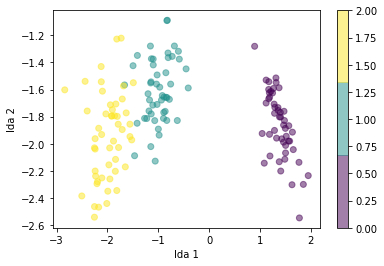

In [147]:
lda = LDA(2)
lda.fit(X,y)
output = lda.transform(X)

dim1 = output[0]
dim2 = output[1]

plt.scatter(
    dim1, dim2, c=y, alpha=0.5, cmap=plt.cm.get_cmap("viridis", 3)
)
plt.xlabel("lda 1")
plt.ylabel("lda 2")
plt.colorbar()
plt.show()

In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

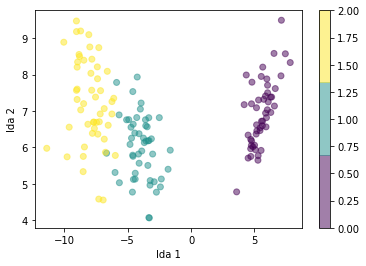

In [136]:
lda = LDA(n_components=2, solver='eigen')
lda.fit(X,y)
output = lda.transform(X)
dim1 = output[:,0]
dim2 = output[:,1]

plt.scatter(
    dim1, dim2, c=y, alpha=0.5, cmap=plt.cm.get_cmap("viridis", 3)
)
plt.xlabel("lda 1")
plt.ylabel("lda 2")
plt.colorbar()
plt.show()